In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from scipy.stats import norm, cauchy
from scipy.ndimage import gaussian_filter1d

In [130]:
# rv = norm()
norm.pdf(0.3495, 0.3496, 0.0001)

2419.707245190357

In [2]:
%matplotlib notebook

In [3]:
os.getcwd()

'/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/inputs/NOVEL/eHH/gammaB1s'

In [153]:
spectra_dir = '../../../../outputs/NOVEL/eHH/gammaB1s/xband_scan_gB1_fields/'
input_dir = 'xband_scan_gB1_fields/'

In [154]:
os.listdir(spectra_dir)

['xband_scan_gB1_000_0p348900T.result']

In [171]:
def extract_dist(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = json.load(f)
    d = data['spinsys']['spins']['1']['x']
    return d

def extract_field(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = json.load(f)
    f = data['settings']['Magnet']['b0']
    return f

def extract_mw(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = json.load(f)
    mw = data['settings']['Gyrotron']['em_frequency']
    return mw

<IPython.core.display.Javascript object>


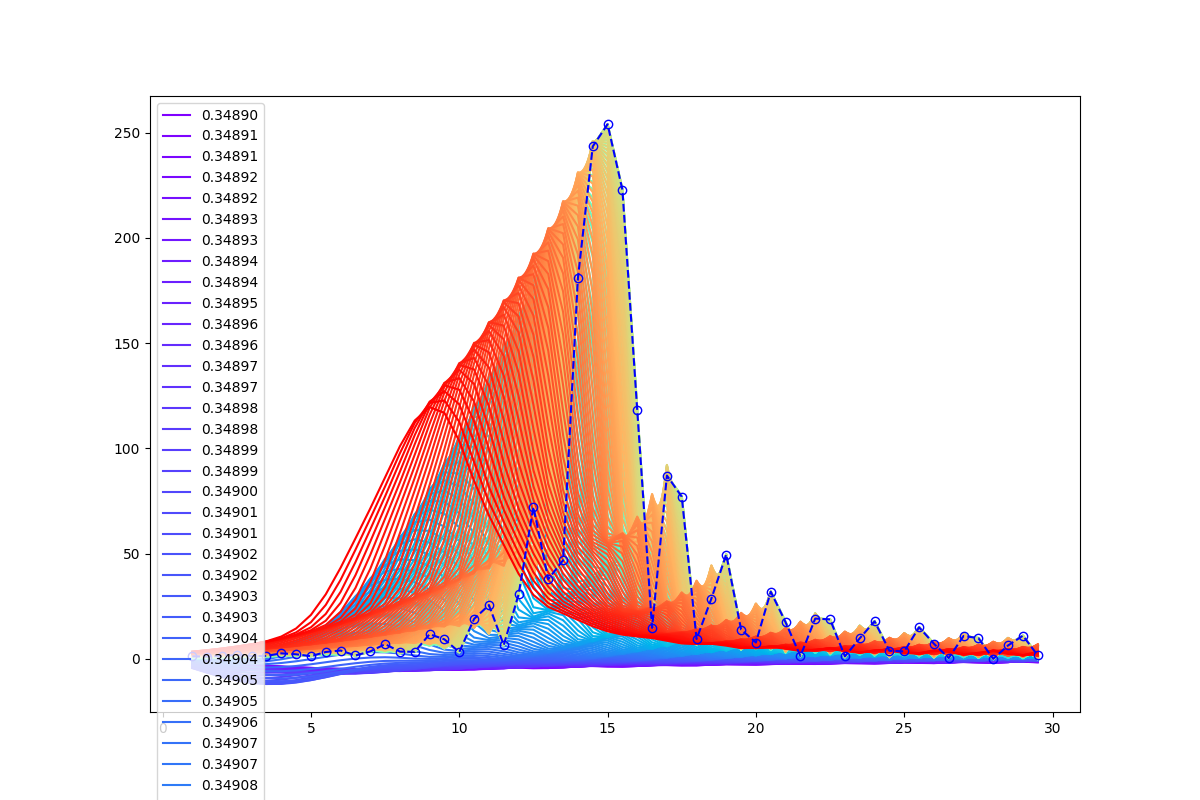

max field: 0.3495798994974874


In [169]:
spectra_dir = '../../../../outputs/NOVEL/eHH/gammaB1s/xband_scan_gB1_fields/'
input_dir = 'xband_scan_gB1_fields/'filenames = sorted(list(os.listdir(spectra_dir)))
colors = plt.cm.rainbow(np.linspace(0, 1, len(filenames)))
sum_path = None
fig = plt.figure(figsize=(12, 8))
max_pos = 0
max_val = 0
ys = []
x = None
fields = []
for filename, color in zip(filenames, colors):
    config_filename = filename.split('.')[0] + '.json'
    config_filepath = os.path.join(input_dir, config_filename)
#     d = extract_dist(config_filepath)
#     label = f'e-H dist {d:.2f}'
    field = extract_field(config_filepath)
    fields.append(field)
    label = f'{field:.5f}'
    filepath = os.path.join(spectra_dir, filename)
    df = pd.read_csv(filepath, skiprows=1, header=None)
    y = df[1].values
    ys.append(y)
    if np.max(y) > max_val:
        max_val = np.max(y)
        max_pos = field
    
    if x is None:
        x = df[0].values
    plt.plot(x/1e6, y, color=color, label=label)
print(f'max field: {max_pos}')

loc = max_pos
scale = 1e-5
pdfs = norm.pdf(fields, loc, scale)
z = np.sum(pdfs)
ratios = pdfs/z
for i in range(len(ys)):
    ys[i] = ys[i] * ratios[i]
ys_mat = np.stack(ys, axis=0)
y_sum = np.sum(ys_mat, axis=0)

plt.plot(x/1e6, y_sum, 'bo--', markerfacecolor='none')
plt.legend(loc='upper left')
plt.show()
filenames = sorted(list(os.listdir(spectra_dir)))
colors = plt.cm.rainbow(np.linspace(0, 1, len(filenames)))
sum_path = None
fig = plt.figure(figsize=(12, 8))
max_pos = 0
max_val = 0
ys = []
x = None
fields = []
for filename, color in zip(filenames, colors):
    config_filename = filename.split('.')[0] + '.json'
    config_filepath = os.path.join(input_dir, config_filename)
#     d = extract_dist(config_filepath)
#     label = f'e-H dist {d:.2f}'
    field = extract_field(config_filepath)
    fields.append(field)
    label = f'{field:.5f}'
    filepath = os.path.join(spectra_dir, filename)
    df = pd.read_csv(filepath, skiprows=1, header=None)
    y = df[1].values
    ys.append(y)
    if np.max(y) > max_val:
        max_val = np.max(y)
        max_pos = field
    
    if x is None:
        x = df[0].values
    plt.plot(x/1e6, y, color=color, label=label)
print(f'max field: {max_pos}')

loc = max_pos
scale = 1e-5
pdfs = norm.pdf(fields, loc, scale)
z = np.sum(pdfs)
ratios = pdfs/z
for i in range(len(ys)):
    ys[i] = ys[i] * ratios[i]
ys_mat = np.stack(ys, axis=0)
y_sum = np.sum(ys_mat, axis=0)

plt.plot(x/1e6, y_sum, 'bo--', markerfacecolor='none')
plt.legend(loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


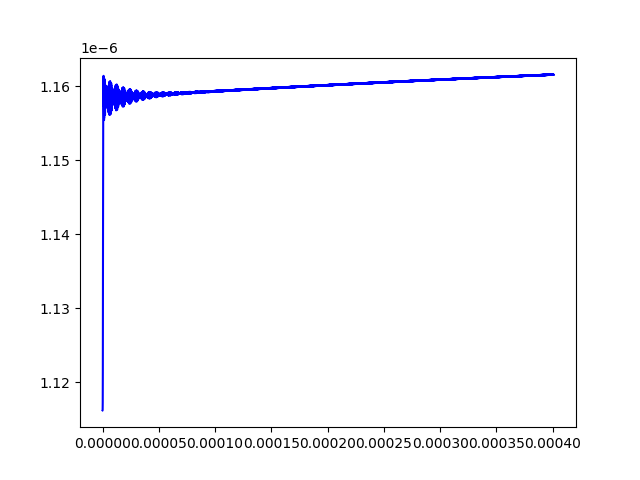

In [75]:
filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/gammaB1s/xband_d006_buildup_loop1_xtal.result'
df = pd.read_csv(filename, skiprows=2, header=None)
fig = plt.figure()
plt.plot(df[0], df[1], 'b-')
# plt.xlim(1.99e-4, 2e-4)
# plt.ylim(1.16e-6, 1.1602e-6)
plt.show()

<IPython.core.display.Javascript object>


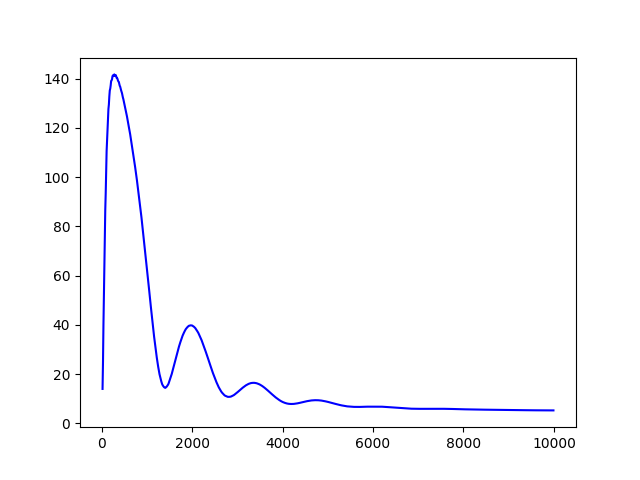

280


In [272]:
filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/xband_scan_mix_param4.result'
df = pd.read_csv(filename, skiprows=2, header=None)
fig = plt.figure()
plt.plot(df[0], df[1], 'b-')
# plt.xlim(1.99e-4, 2e-4)
# plt.ylim(1.16e-6, 1.1602e-6)
pos = np.argmax(df[1])
print(df[0][pos])
plt.show()

<IPython.core.display.Javascript object>


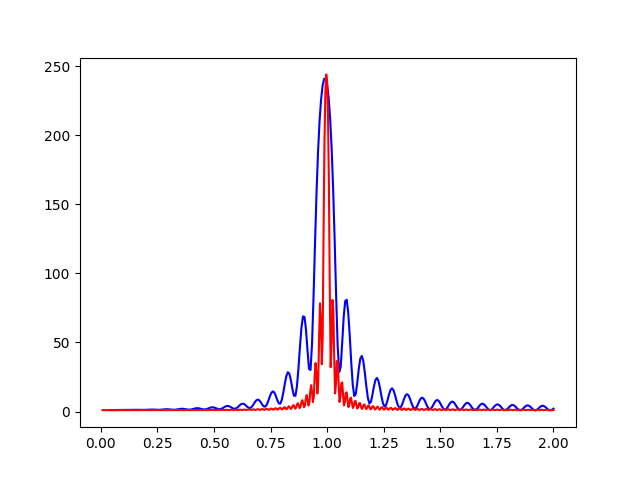

In [85]:
filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/xband_scan_gB1_param2.result'
df = pd.read_csv(filename, skiprows=2, header=None)
filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/qband_scan_gB1_param2.result'
df2 = pd.read_csv(filename, skiprows=2, header=None)
fig = plt.figure()
plt.plot(df[0]/15e6, df[1], 'b-')
plt.plot(df2[0]/51e6, df2[1], 'r-')
plt.show()

<IPython.core.display.Javascript object>


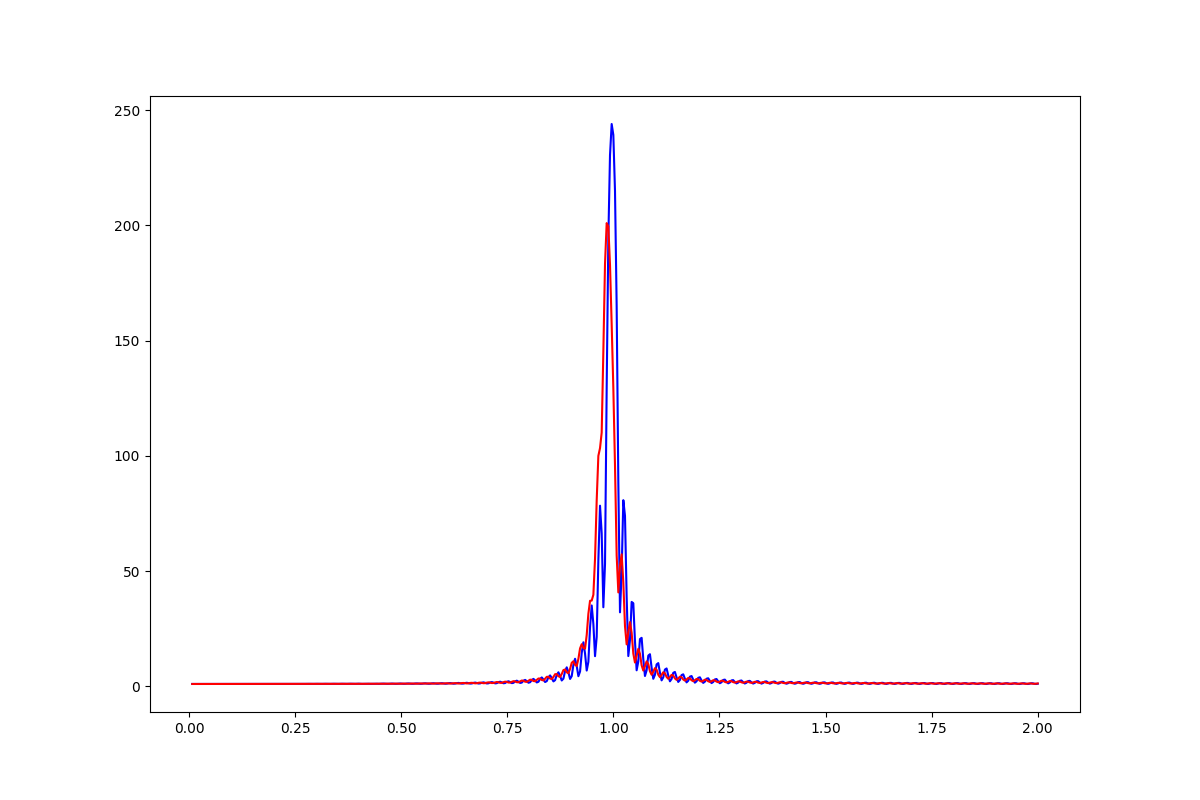

In [88]:
filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/qband_scan_gB1_param2.result'
df = pd.read_csv(filename, skiprows=2, header=None)
filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/qband_scan_gB1_param2_1p1954T.result'
df2 = pd.read_csv(filename, skiprows=2, header=None)
fig = plt.figure(figsize=(12,8))
plt.plot(df[0]/51e6, df[1], 'b-')
plt.plot(df2[0]/51e6, df2[1], 'r-')
plt.show()

40 microwave values.


<IPython.core.display.Javascript object>


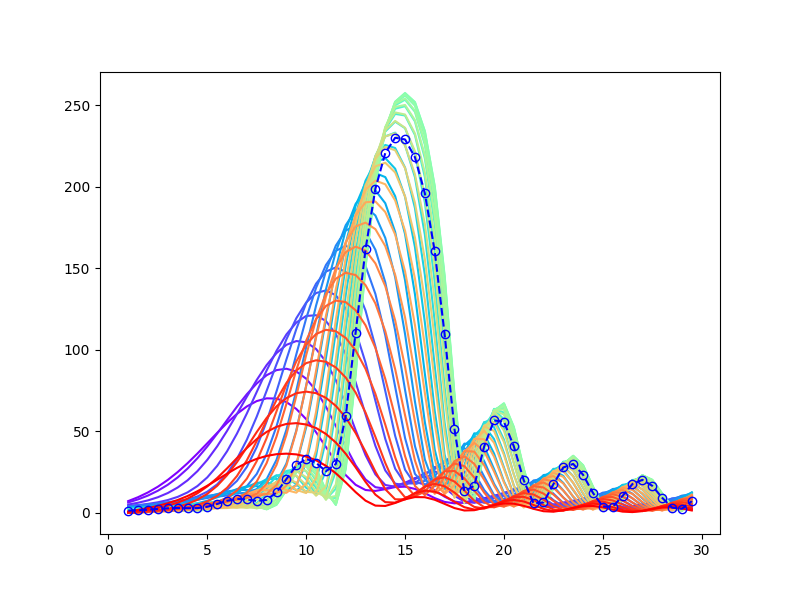

max mw: 9.800335042735043GHz
[9786933333.333334, 9787603418.80342, 9788273504.273504, 9788943589.74359, 9789613675.213676, 9790283760.683762, 9790953846.153847, 9791623931.623932, 9792294017.094017, 9792964102.564102, 9793634188.03419, 9794304273.504274, 9794974358.97436, 9795644444.444445, 9796314529.91453, 9796984615.384615, 9797654700.8547, 9798324786.324787, 9798994871.794872, 9799664957.264957, 9800335042.735043, 9801005128.205128, 9801675213.675213, 9802345299.1453, 9803015384.615385, 9803685470.08547, 9804355555.555555, 9805025641.02564, 9805695726.495726, 9806365811.96581, 9807035897.435898, 9807705982.905983, 9808376068.376068, 9809046153.846153, 9809716239.316238, 9810386324.786324, 9811056410.25641, 9811726495.726496, 9812396581.19658, 9813066666.666666]


In [281]:
q_factor = 5000
post_fix = 'microwaves_400loops'
spectra_dir = f'../../../../outputs/NOVEL/eHH/gammaB1s/xband_scan_gB1_{post_fix}/'
input_dir = f'xband_scan_gB1_{post_fix}/'
filenames = sorted(list(os.listdir(spectra_dir)))
print(f'{len(filenames)} microwave values.')
colors = plt.cm.rainbow(np.linspace(0, 1, len(filenames)))
sum_path = None
fig = plt.figure(figsize=(8, 6))
max_pos = 0
max_val = 0
ys = []
x = None
mws = []
idx = 0
max_idx = 0
for filename, color in zip(filenames, colors):
    config_filename = filename.split('.')[0] + '.json'
    config_filepath = os.path.join(input_dir, config_filename)
#     d = extract_dist(config_filepath)
#     label = f'e-H dist {d:.2f}'
    mw = extract_mw(config_filepath)
    mws.append(mw)
    label = f'{mw/1e9:.5f}'
    filepath = os.path.join(spectra_dir, filename)
    df = pd.read_csv(filepath, skiprows=1, header=None)
    y = df[1].values
#     y = gaussian_filter1d(y, 2)
    ys.append(y)
    if np.max(y) > max_val:
        max_val = np.max(y)
        max_pos = mw
        max_idx = idx
    if x is None:
        x = df[0].values
    plt.plot(x/1e6, y, color=color, label=label)
    idx += 1
print(f'max mw: {max_pos/1e9}GHz')

xband_max_y = np.copy(ys[max_idx])
xband_max_x = np.copy(x)

loc = max_pos
scale = max_pos/q_factor
pdfs = cauchy.pdf(mws, loc, scale)
z = np.sum(pdfs)
ratios = pdfs/z
for i in range(len(ys)):
    ys[i] = ys[i] * ratios[i]
ys_mat = np.stack(ys, axis=0)
y_sum = np.sum(ys_mat, axis=0)

print(mws)

plt.plot(x/1e6, y_sum, 'bo--', markerfacecolor='none')
# plt.legend(loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


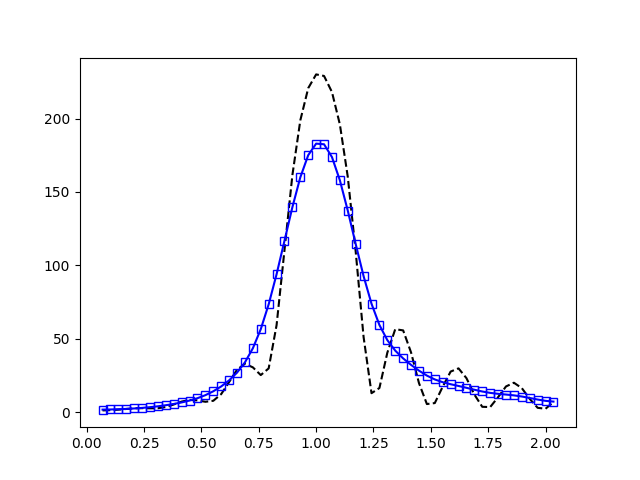

In [282]:
y_sum_smooth = gaussian_filter1d(y_sum, 3)
pos = np.argmax(y_sum_smooth)
max_x = x[pos]

fig = plt.figure()
plt.plot(x/max_x, y_sum, 'k--', markerfacecolor='none')
plt.plot(x/max_x, y_sum_smooth, 'bs-', markerfacecolor='none')
# plt.legend(loc='upper left')
plt.show()

In [477]:
os.getcwd()

'/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/inputs/NOVEL/eHH/gammaB1s'

## Q-band

<IPython.core.display.Javascript object>


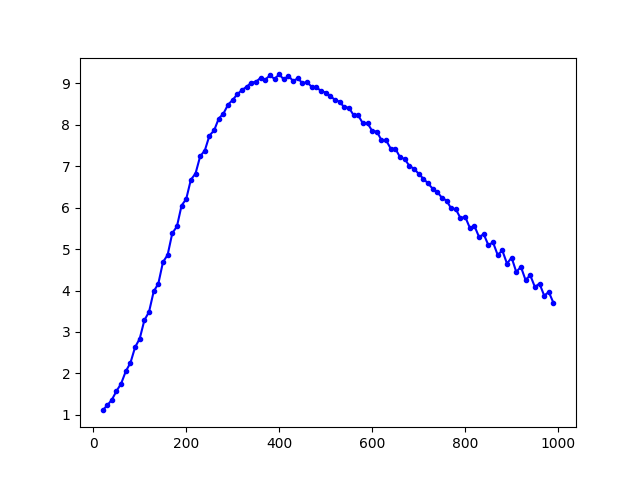

400


In [294]:
filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/qband_scan_mix_param4_loop5.result'
df = pd.read_csv(filename, skiprows=2, header=None)
fig = plt.figure()
plt.plot(df[0], df[1], 'b.-')
# plt.xlim(1.99e-4, 2e-4)
# plt.ylim(1.16e-6, 1.1602e-6)
pos = np.argmax(df[1])
print(df[0][pos])
plt.show()

<IPython.core.display.Javascript object>


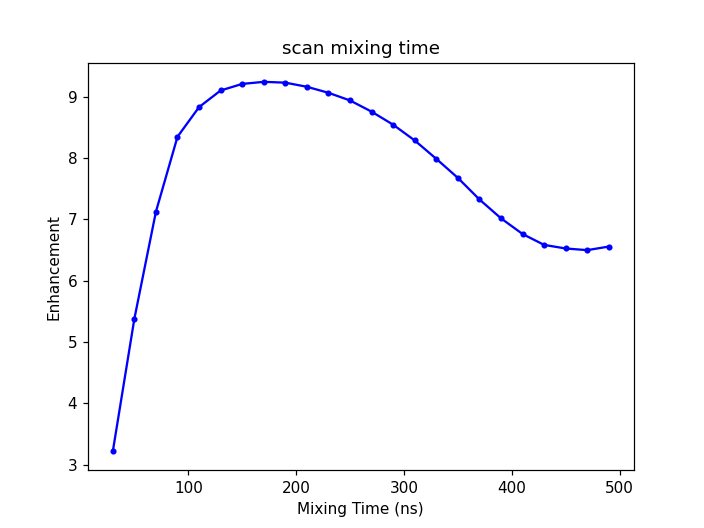

170


In [464]:
# filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/xband_scan_mix_param4_loop100.result'
root_dir = '/home/chen/coding/projects/dnpsoup'
filename = 'dnpsoup_analytics/outputs/NOVEL/HeHH/qband_scan_mix_loop50_zcw2_55.result'
filepath = os.path.join(root_dir, filename)
df = pd.read_csv(filepath, skiprows=2, header=None)
fig = plt.figure()
plt.plot(df[0], df[1], 'b.-')
# plt.xlim(1.99e-4, 2e-4)
# plt.ylim(1.16e-6, 1.1602e-6)
pos = np.argmax(df[1])
print(df[0][pos])
plt.title('scan mixing time')
plt.xlabel('Mixing Time (ns)')
plt.ylabel('Enhancement')
plt.show()

<IPython.core.display.Javascript object>


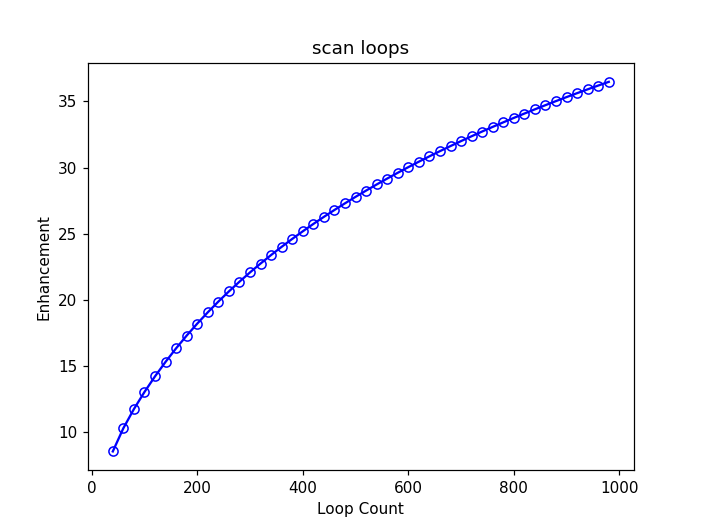

980


In [466]:
root_dir = '/home/chen/coding/projects/dnpsoup'
filename = 'dnpsoup_analytics/outputs/NOVEL/HeHH/qband_scan_loop_mix200_zcw2_55.result'
filepath = os.path.join(root_dir, filename)
df = pd.read_csv(filepath, skiprows=2, header=None)
fig = plt.figure()
plt.plot(df[0], df[1], 'bo-', markerfacecolor='none')
pos = np.argmax(df[1])
print(df[0][pos])
plt.title('scan loops')
plt.xlabel('Loop Count')
plt.ylabel('Enhancement')
plt.show()

<IPython.core.display.Javascript object>


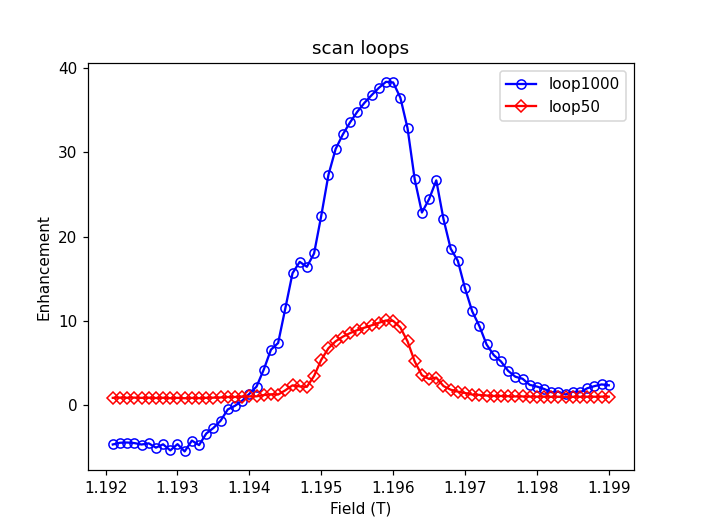

1.1958999999999995


In [469]:
# field profile
root_dir = '/home/chen/coding/projects/dnpsoup'
filename = 'dnpsoup_analytics/outputs/NOVEL/HeHH/qband_fp_mix200_loop1000_zcw2_55.result'
filepath = os.path.join(root_dir, filename)
df = pd.read_csv(filepath, skiprows=2, header=None)

filename = 'dnpsoup_analytics/outputs/NOVEL/HeHH/qband_fp_mix200_loop50_zcw2_55.result'
filepath = os.path.join(root_dir, filename)
df2 = pd.read_csv(filepath, skiprows=2, header=None)
fig = plt.figure()
plt.plot(df[0], df[1], 'bo-', markerfacecolor='none', label='loop1000')
plt.plot(df2[0], df2[1], 'rD-', markerfacecolor='none', label='loop50')
pos = np.argmax(df[1])
print(df[0][pos])
plt.title('scan loops')
plt.xlabel('Field (T)')
plt.ylabel('Enhancement')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


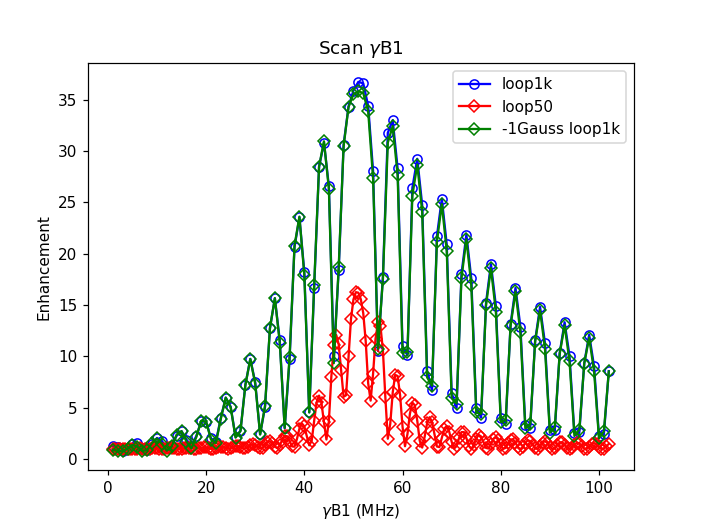

51000000


In [476]:
root_dir = '/home/chen/coding/projects/dnpsoup'
filename = 'dnpsoup_analytics/outputs/NOVEL/HeHH/qband_scan_gB1_mix200_loop1000_zcw2_55.result'
filepath = os.path.join(root_dir, filename)
df = pd.read_csv(filepath, skiprows=2, header=None)

filename = 'dnpsoup_analytics/outputs/NOVEL/eHH/HeHH_qband_scan_gB1_param4_mix300_loop100.result'
filepath = os.path.join(root_dir, filename)
df2 = pd.read_csv(filepath, skiprows=2, header=None)

filename = 'dnpsoup_analytics/outputs/NOVEL/HeHH/qband_scan_gB1_n1Gauss_mix200_loop1000_zcw2_55.result'
filepath = os.path.join(root_dir, filename)
df3 = pd.read_csv(filepath, skiprows=2, header=None)


fig = plt.figure()
plt.plot(df[0]/1e6, df[1], 'bo-', markerfacecolor='none', label='loop1k')
plt.plot(df2[0]/1e6, df2[1], 'rD-', markerfacecolor='none', label='loop50')
plt.plot(df3[0]/1e6, df3[1], 'gD-', markerfacecolor='none', label='-1Gauss loop1k')
pos = np.argmax(df[1])
print(df[0][pos])
plt.title('Scan $\gamma$B1')
plt.xlabel('$\gamma$B1 (MHz)')
plt.ylabel('Enhancement')
plt.legend()
plt.show()

### more H's

max_pos1: 101
max_pos2: 100
max_pos3: 101
max_pos4: 101


<IPython.core.display.Javascript object>


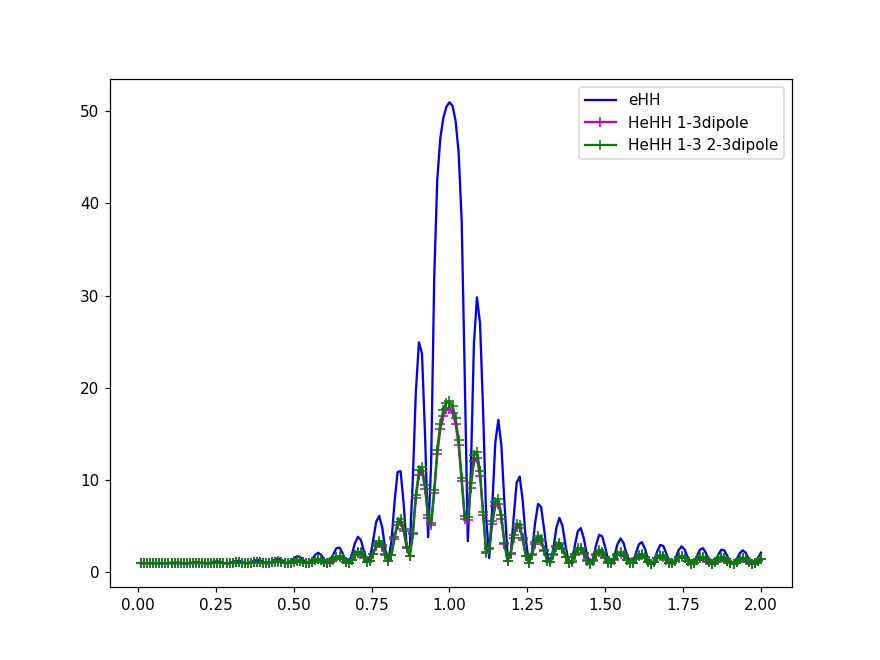

In [460]:
result_dir = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH'
filename1 = 'qband_scan_gB1_param4_mix300_loop100.result'
df1 = pd.read_csv(os.path.join(result_dir, filename1), comment='#', header=None)
max_pos1 = np.argmax(df1[1].values)
print(f'max_pos1: {max_pos1}')
# df1[1] = df1[1]/df1[1].values[max_pos1]

filename2 = 'HeHH_qband_scan_gB1_param4_mix300_loop100.result'
df2 = pd.read_csv(os.path.join(result_dir, filename2), comment='#', header=None)
max_pos2 = np.argmax(df2[1].values)
print(f'max_pos2: {max_pos2}')
# df2[1] = df2[1]/df2[1].values[max_pos2]

filename3 = 'HeHH_13dipole_qband_scan_gB1_param4_mix300_loop100.result'
df3 = pd.read_csv(os.path.join(result_dir, filename3), comment='#', header=None)
max_pos3 = np.argmax(df3[1].values)
print(f'max_pos3: {max_pos3}')
# df3[1] = df3[1]/df3[1].values[max_pos3]

filename4 = 'HeHH_13_23dipole_qband_scan_gB1_param4_mix300_loop100.result'
df4 = pd.read_csv(os.path.join(result_dir, filename4), comment='#', header=None)
max_pos4 = np.argmax(df4[1].values)
print(f'max_pos4: {max_pos4}')
# df4[1] = df4[1]/df4[1].values[max_pos4]

fig = plt.figure(figsize=(8, 6))
plt.plot(df1[0]/51e6, df1[1], 'b-', markerfacecolor='none', label='eHH')
# plt.plot(df2[0]/51e6, df2[1], 'rx-', markerfacecolor='none', label='HeHH')
plt.plot(df3[0]/51e6, df3[1], 'm+-', markerfacecolor='none', label='HeHH 1-3dipole')
plt.plot(df4[0]/51e6, df4[1], 'g+-', markerfacecolor='none', label='HeHH 1-3 2-3dipole')
plt.legend()
plt.show()

### Field Dependent Broadening

q band center: 51000000


<IPython.core.display.Javascript object>


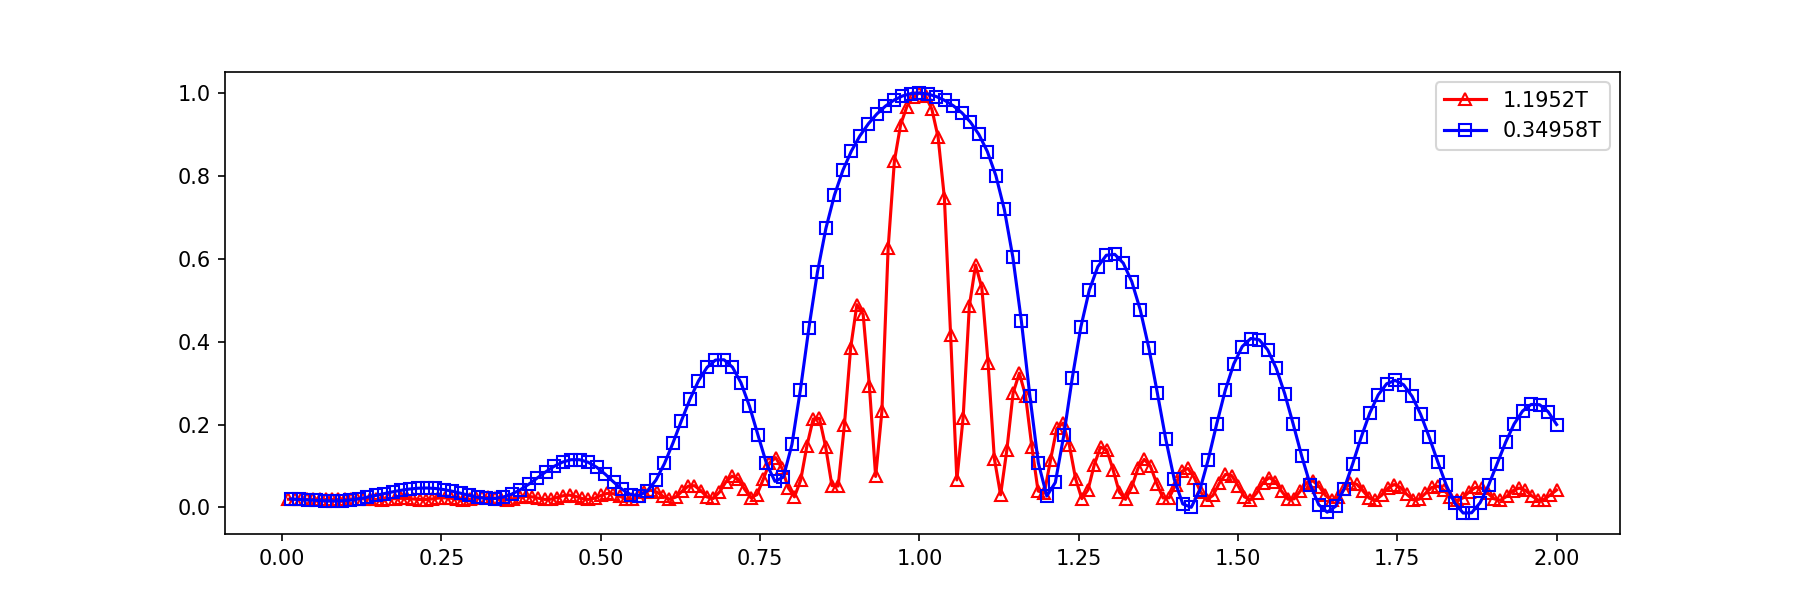

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


x band center: 15000000
4400000


In [436]:
filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/qband_scan_gB1_param4_mix300_loop100.result'
df_q = pd.read_csv(filename, skiprows=1, header=None)
pos_q = np.argmax(df_q[1])
print(f'q band center: {df_q[0][pos_q]}')
fig = plt.figure(figsize=(12, 4), dpi=100)
plt.plot(df_q[0]/df_q[0][pos_q], df_q[1]/np.max(df_q[1]), 'r^-', label='1.1952T', markerfacecolor='none')

filename2 = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/xband_scan_gB1_param4_mix300_loop100.result'
df_x = pd.read_csv(filename2, skiprows=1, header=None)
pos_x = np.argmax(df_x[1])
print(f'x band center: {df_x[0][pos_x]}')
plt.plot(df_x[0]/df_x[0][pos_x], df_x[1]/np.max(df_x[1]), 'bs-', label='0.34958T', markerfacecolor='none')

# plt.xlim(1.99e-4, 2e-4)
# plt.ylim(1.16e-6, 1.1602e-6)

print(df[0][pos])
plt.legend(loc='best')
plt.savefig('NOVEL_scan_gammaB1_field_dependence.ps')
plt.show()

In [437]:
1/(0.2*15e6)

3.3333333333333335e-07

In [415]:
print(f'x-band fp contains {df_x.shape[0]} ponits')
print(f'q-band fp contains {df_q.shape[0]} ponits')

x-band fp contains 150 ponits
q-band fp contains 204 ponits


ratio: 0.21587945523036803


<IPython.core.display.Javascript object>


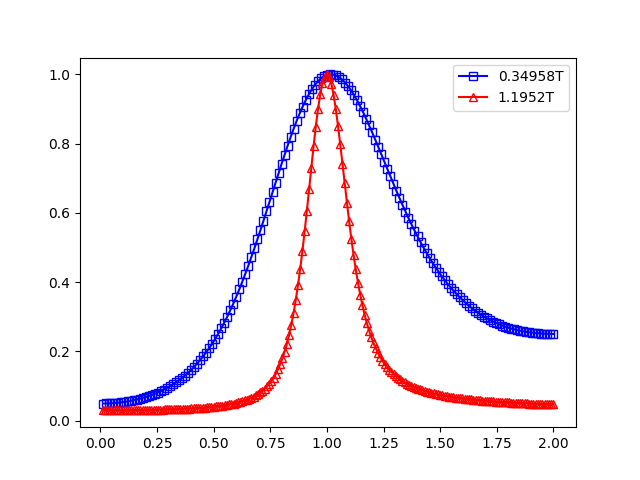

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [433]:
scale_x = 15
scale_q = scale_x / df_x.shape[0] * df_q.shape[0] * 14.7e6 / 51e6
print(f'ratio: {ratio}')
xband_y_smooth = gaussian_filter1d(df_x[1].values, scale_x)
xband_x = df_x[0] / 15e6
# qband
qband_y_smooth = gaussian_filter1d(df_q[1].values, scale_q)
qband_x = df_q[0] / 51e6

fig = plt.figure()
plt.plot(xband_x, xband_y_smooth/np.max(xband_y_smooth), 'bs-', markerfacecolor='none', label='0.34958T')
plt.plot(qband_x, qband_y_smooth/np.max(qband_y_smooth), 'r^-', markerfacecolor='none', label='1.1952T')
plt.legend(loc='best')
plt.savefig('NOVEL_scan_gammaB1_field_dependence_smooth.ps')
plt.show()

In [396]:
arr1 = np.array([0,0,0,0,0,1,0,0,0,0,0], dtype=float)
arr2 = np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0], dtype=float)
arr1f = gaussian_filter1d(arr1, 1)
arr2f = gaussian_filter1d(arr2, 1)

<IPython.core.display.Javascript object>


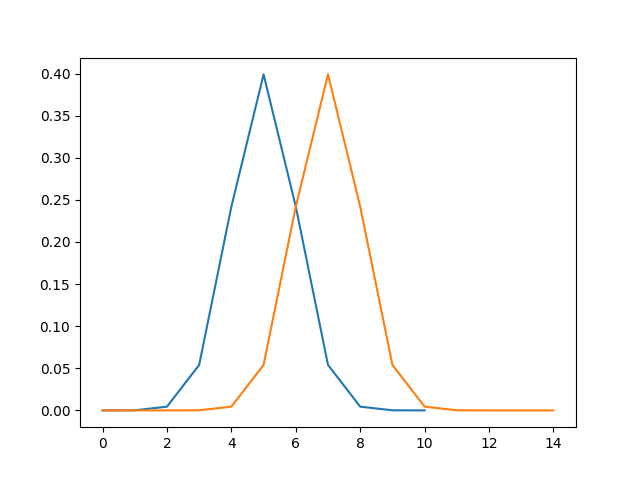

In [398]:
fig = plt.figure()
plt.plot(arr1f)
plt.plot(arr2f)
plt.show()

### X-band $\gamma$B1 Mixing Dependence for oscillation modes

<IPython.core.display.Javascript object>


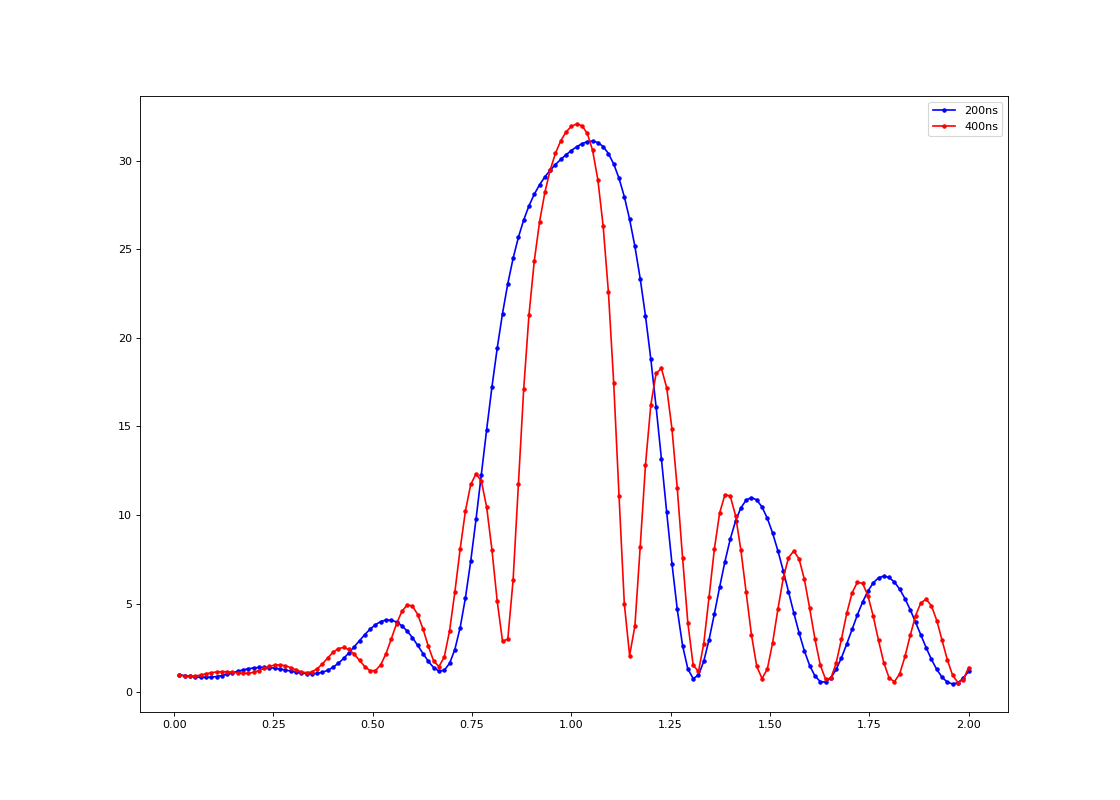

4400000


In [434]:
filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/xband_scan_gB1_param4_mix200_loop50.result'
df = pd.read_csv(filename, skiprows=1, header=None)
fig = plt.figure(figsize=(14, 10), dpi=80)
plt.plot(df[0]/15e6, df[1], 'b.-', label='200ns')

filename2 = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/xband_scan_gB1_param4_mix400_loop50.result'
df2 = pd.read_csv(filename2, skiprows=1, header=None)
plt.plot(df2[0]/15e6, df2[1], 'r.-', label='400ns')

# filename3 = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/xband_scan_gB1_param4_mix800_loop50.result'
# df3 = pd.read_csv(filename3, skiprows=1, header=None)
# plt.plot(df3[0]/14.7e6, df3[1], 'm.-', label='800ns')

# plt.xlim(1.99e-4, 2e-4)
# plt.ylim(1.16e-6, 1.1602e-6)
pos_q = np.argmax(df[1])
plt.legend(loc='best')
print(df[0][pos])
# plt.savefig('NOVEL_scan_gammaB1_mixing_time_200ns_vs_400ns.ps')
plt.show()

## Mixing time & Q-factor

<IPython.core.display.Javascript object>


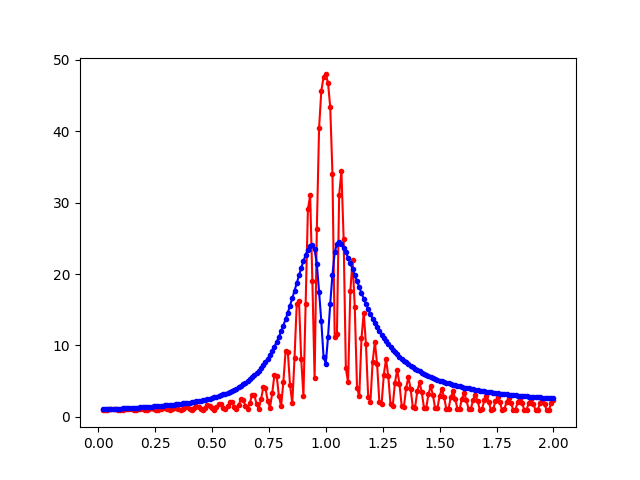

11500000


In [344]:
filename = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/qband_scan_gB1_param4_mix400_loop100.result'
df = pd.read_csv(filename, skiprows=2, header=None)
fig = plt.figure()
plt.plot(df[0]/51e6, df[1], 'r.-')

filename2 = '/home/chen/coding/projects/dnpsoup/dnpsoup_analytics/outputs/NOVEL/eHH/qband_scan_gB1_param4_mix10us_d100us_loop100.result'
df2 = pd.read_csv(filename2, skiprows=2, header=None)
plt.plot(df2[0]/516e6, df2[1], 'b.-')

# plt.xlim(1.99e-4, 2e-4)
# plt.ylim(1.16e-6, 1.1602e-6)
pos_q = np.argmax(df[1])
print(df[0][pos])
plt.show()

50 microwave values.


<IPython.core.display.Javascript object>


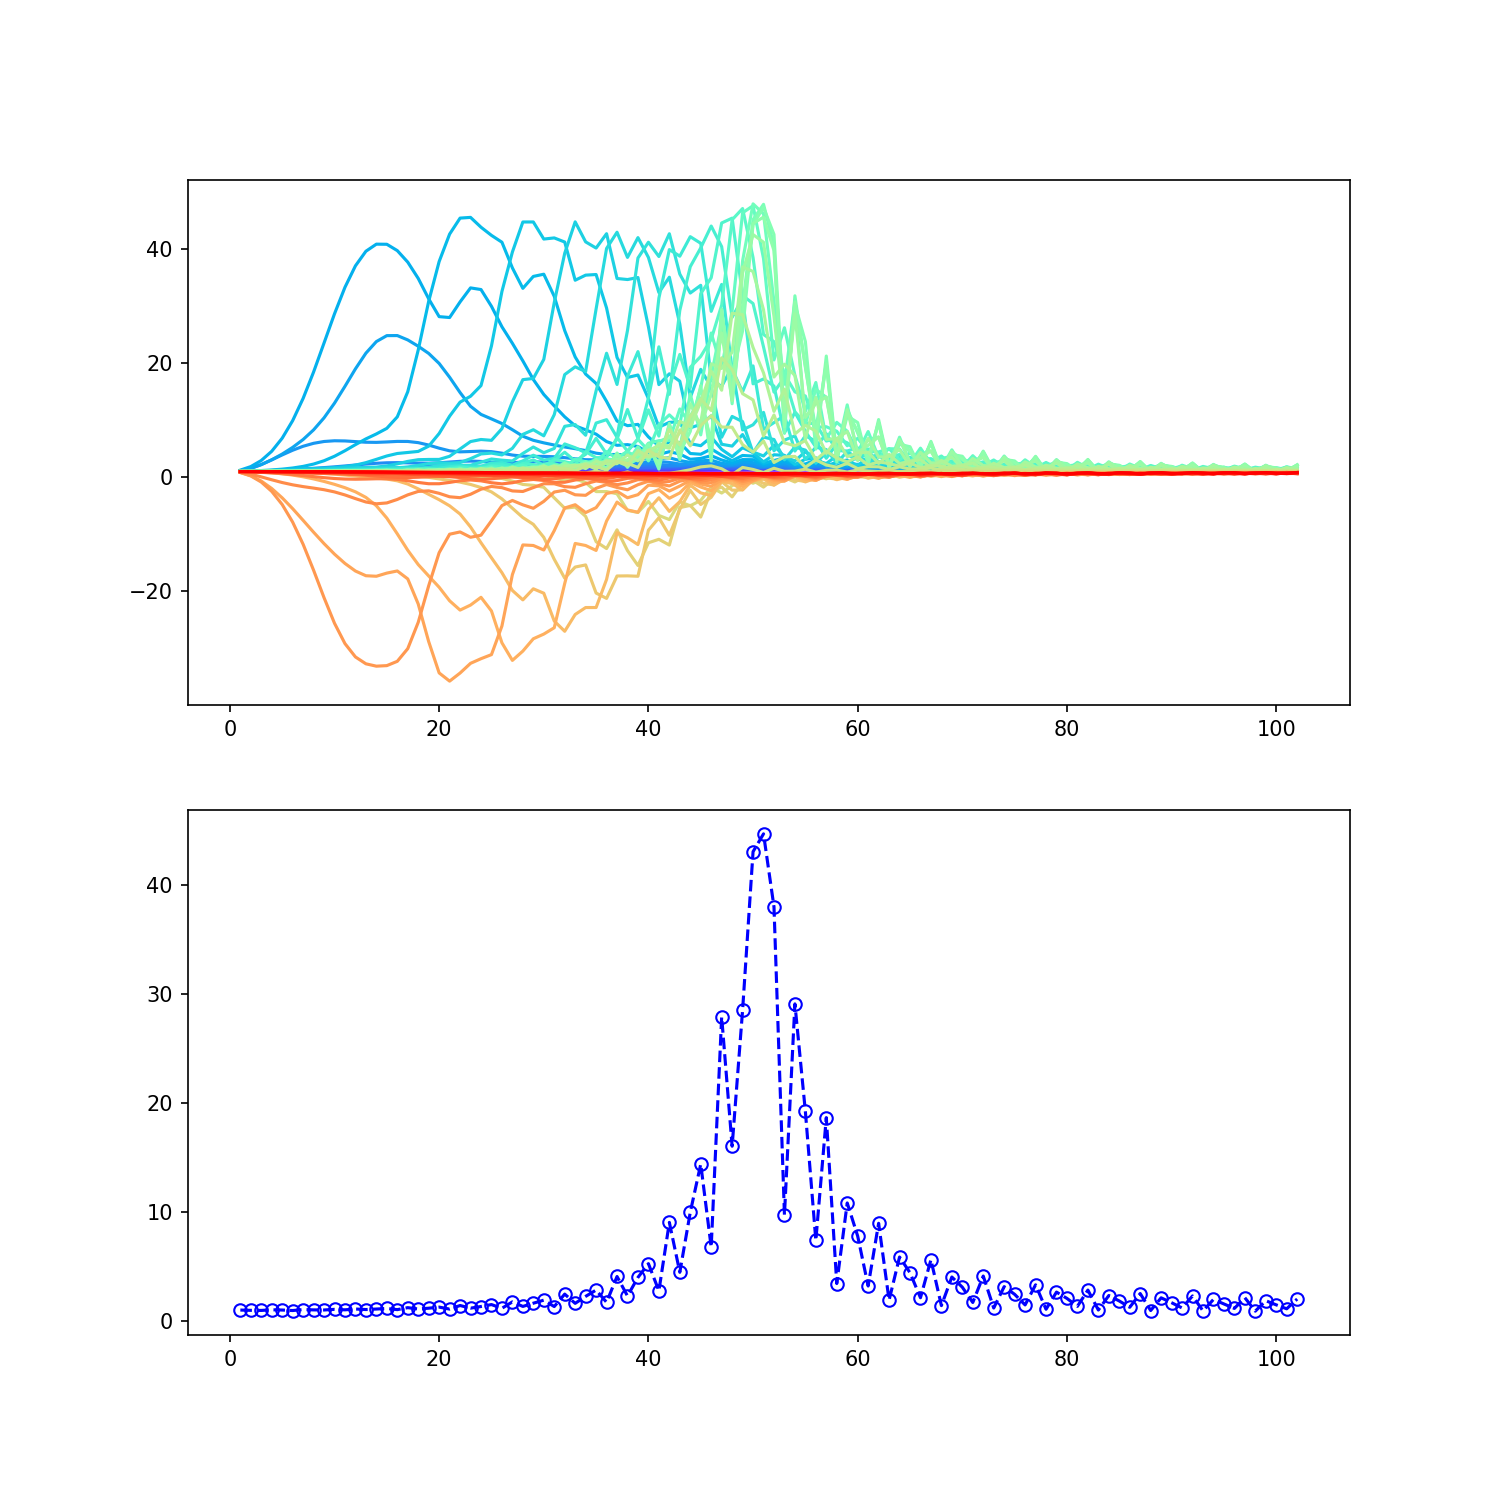

max mw: 33.49952979591836GHz
[33415653333.333332, 33419300136.05442, 33422946938.77551, 33426593741.496597, 33430240544.217686, 33433887346.938774, 33437534149.659863, 33441180952.38095, 33444827755.10204, 33448474557.823128, 33452121360.544216, 33455768163.265305, 33459414965.986393, 33463061768.70748, 33466708571.42857, 33470355374.14966, 33474002176.870747, 33477648979.591835, 33481295782.312923, 33484942585.03401, 33488589387.7551, 33492236190.47619, 33495882993.197277, 33499529795.918365, 33503176598.639454, 33506823401.360546, 33510470204.081635, 33514117006.802723, 33517763809.52381, 33521410612.2449, 33525057414.96599, 33528704217.687077, 33532351020.408165, 33535997823.129253, 33539644625.85034, 33543291428.57143, 33546938231.29252, 33550585034.013607, 33554231836.734695, 33557878639.455784, 33561525442.176872, 33565172244.89796, 33568819047.61905, 33572465850.340137, 33576112653.061226, 33579759455.782314, 33583406258.503403, 33587053061.22449, 33590699863.94558, 33594346666.

In [438]:
q_factor = 1500
post_fix = 'qfactor1500_mix400_loop100'
# post_fix = 'qfactor1500_mix10000_loop100'
spectra_dir = f'../../../../outputs/NOVEL/eHH/gammaB1s/qband_scan_gB1_{post_fix}/'
input_dir = f'qband_scan_gB1_{post_fix}/'
filenames = sorted(list(os.listdir(spectra_dir)))
print(f'{len(filenames)} microwave values.')
colors = plt.cm.rainbow(np.linspace(0, 1, len(filenames)))
sum_path = None
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
max_pos = 0
max_val = 0
ys = []
x = None
mws = []
mw_freqs = []
for filename, color in zip(filenames, colors):
    config_filename = filename.split('.')[0] + '.json'
    config_filepath = os.path.join(input_dir, config_filename)
#     d = extract_dist(config_filepath)
#     label = f'e-H dist {d:.2f}'
    mw = extract_mw(config_filepath)
    mws.append(mw)
    label = f'{mw/1e9:.5f}'
    filepath = os.path.join(spectra_dir, filename)
    df = pd.read_csv(filepath, skiprows=1, header=None)
    y = df[1].values
#     y = gaussian_filter1d(y, 2)
    ys.append(y)
    if np.max(y) > max_val:
        max_val = np.max(y)
        max_pos = mw
    
    if x is None:
        x = df[0].values
    axes[0].plot(x/1e6, y, color=color, label=label)
print(f'max mw: {max_pos/1e9}GHz')

loc = 33.505e9
scale = 1e6
pdfs = cauchy.pdf(mws, loc, scale)
z = np.sum(pdfs)
ratios = pdfs/z
for i in range(len(ys)):
    ys[i] = ys[i] * ratios[i]
ys_mat = np.stack(ys, axis=0)
y_sum = np.sum(ys_mat, axis=0)

print(mws)

axes[1].plot(x/1e6, y_sum, 'bo--', markerfacecolor='none')
# plt.legend(loc='upper left')
plt.show()